# Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Load Data 

In [31]:
LoanBorrower = pd.read_csv('Filtered/LoanBorrowerRelationship.csv', sep=';')
LoanLender = pd.read_csv('Filtered/LoanActions.csv', sep=';')
LoanTeam = pd.read_csv('Filtered/LoanTeamRelationship.csv', sep=';')

#df = pd.merge(LoanBorrower, LoanTeam, on='loan_id')
df = pd.merge(LoanBorrower, LoanLender, on='loan_id')

# Graph

In [32]:
#G = nx.from_pandas_edgelist(df, 'borrower_id', 'team_id')
G = nx.from_pandas_edgelist(df, 'borrower_id', 'lender_id')
nx.info(G)

'Graph with 12918 nodes and 45653 edges'

# Largest connected component

In [33]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

# Graph statistics

In [34]:
nx.info(G0)

'Graph with 12738 nodes and 45507 edges'

In [35]:
nx.is_connected(G0)

True

In [36]:
nx.density(G0)

0.0005609702222036001

In [39]:
nx.transitivity(G0)

0

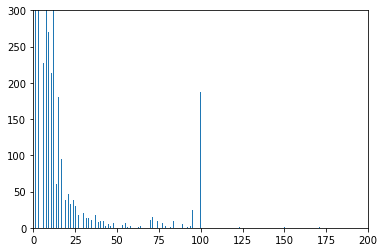

In [37]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins = 1000)
    plt.xlim(0, 200)
    plt.ylim(0, 300)
    plt.show()

plot_degree_dist(G0)

In [ ]:
#https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

# Gephi output

In [ ]:
nx.write_gexf(G0, "test.gexf")